In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
pip install opencv-python

In [3]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml


--2024-04-06 04:23:44--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.04s   

2024-04-06 04:23:44 (23.3 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



In [4]:
import cv2
import os
import zipfile
import numpy as np
from google.colab.patches import cv2_imshow  # Import cv2_imshow for display

def extract_faces(video_path, cascade_path, output_dir, skip_frame=12, target_size=(92, 112)):
  if not os.path.exists(video_path):
    print(f"Error: Video file not found: {video_path}")
    return

  cap = None
  try:
    cap = cv2.VideoCapture(video_path)
  except cv2.VideoCaptureError:
    print(f"Error opening video file: {video_path}")
    return

  if not cap.isOpened():
    print("Error opening video file!")
    return

  face_cascade = cv2.CascadeClassifier(cascade_path)
  count = 0
  os.makedirs(output_dir, exist_ok=True)

  while True:
    ret, frame = cap.read()
    if not ret:
      break

    if count % skip_frame == 0:
      gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
      faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

      for (x, y, w, h) in faces:
        face_roi = gray[y:y+h, x:x+w]

        if face_roi.shape[0:2] != target_size:
          face_roi = cv2.resize(face_roi, target_size, interpolation=cv2.INTER_AREA)

        face_roi = np.uint8(255 * face_roi)
        filename = os.path.join(output_dir, f"{count}.pgm")
        cv2.imwrite(filename, face_roi)
        count += 1

    # Use cv2_imshow for display (optional, may not be reliable)
    # cv2_imshow(frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
      break

  cap.release()
  cv2.destroyAllWindows()
  print(f"Extracted faces saved to {output_dir}.")


def create_zip(output_dir, zip_filename):
  with zipfile.ZipFile(zip_filename, 'w') as zip_file:
    for filename in os.listdir(output_dir):
      filepath = os.path.join(output_dir, filename)
      zip_file.write(filepath, filename)


# Replace with your video and haar cascade paths
video_path = "/content/drive/MyDrive/pca/sudhamurtyvideo.mp4"
cascade_path = "haarcascade_frontalface_default.xml"
output_dir = "/content/drive/MyDrive/pca/extracted_faces"
zip_filename = "/content/drive/MyDrive/pca/faces.zip"

extract_faces(video_path, cascade_path, output_dir)
create_zip(output_dir, zip_filename)

print(f"Faces zipped to {zip_filename}.")

Extracted faces saved to /content/drive/MyDrive/pca/extracted_faces.
Faces zipped to /content/drive/MyDrive/pca/faces.zip.


Showing sample faces


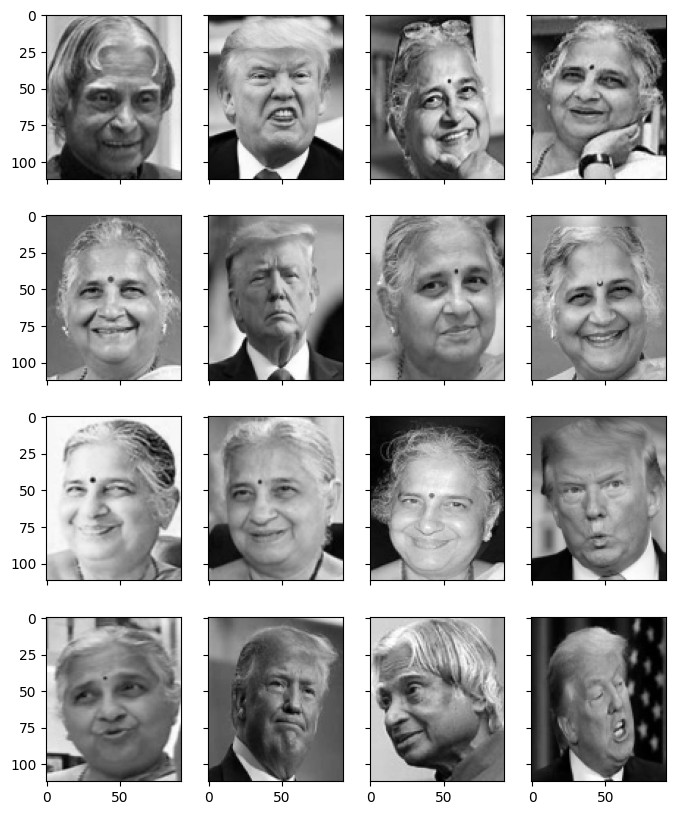

Face image shape: (112, 92)
Number of classes: 45
Number of images: 480
Showing the eigenfaces


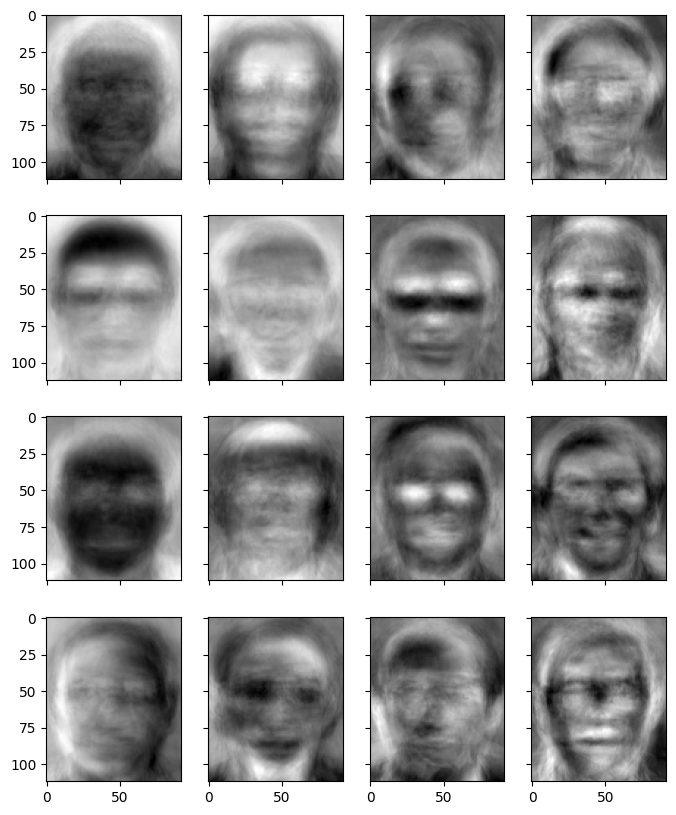

Shape of the weight matrix: (50, 469)
Best match s39 with Euclidean distance 1559.325717


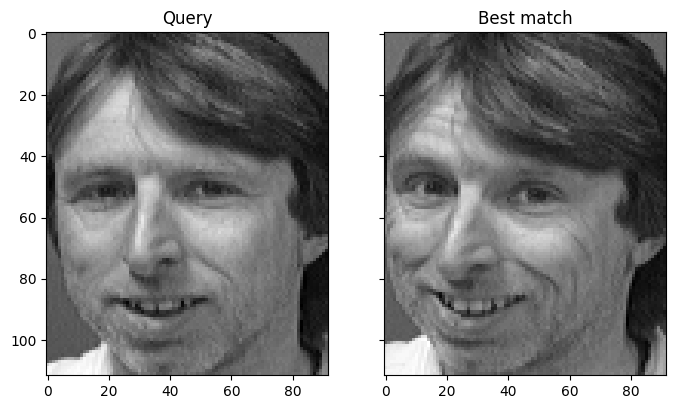

Best match s5 with Euclidean distance 2641.633145


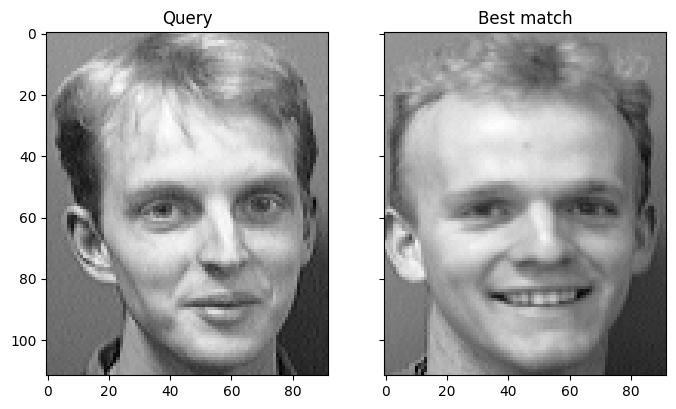

Give any name of person to check whether he is in the video frames:s41
Best match results: [454, 446, 454, 454, 454, 454, 381, 454, 381, 427, 381, 454, 381, 454, 461, 460, 461, 381, 461, 381, 454, 461, 453, 454, 453, 442, 454, 460, 454, 381, 454, 460, 427, 427, 381, 427, 427, 460, 427, 381, 427, 381, 454, 381, 427, 381, 381, 427, 460, 427, 460, 427, 460, 454, 460, 461, 460, 461, 381, 461, 381, 461, 381, 461, 381, 381, 461, 460, 461, 461, 461, 381, 381, 381, 454, 381, 454, 381, 454, 381, 454, 381, 454, 381, 461, 381, 461, 188, 425, 425, 456, 350, 425, 454, 381, 461, 381, 461, 381, 461, 381, 461, 381, 461, 381, 461, 381, 461, 381, 454, 381, 454, 461, 381, 427, 427, 461, 381, 454, 454, 461, 454, 454, 460, 380, 454, 454, 461, 461, 461, 454, 454, 454, 461, 454, 454, 461, 461, 454, 454, 454, 454, 454, 427, 454, 460, 467, 427, 427, 446, 461, 357, 248, 446, 248, 446, 248, 427, 427, 427, 454, 454, 381, 454, 350, 446, 454, 454, 454, 460, 461, 454, 381, 427, 381, 454, 454, 456, 350, 350, 350, 442

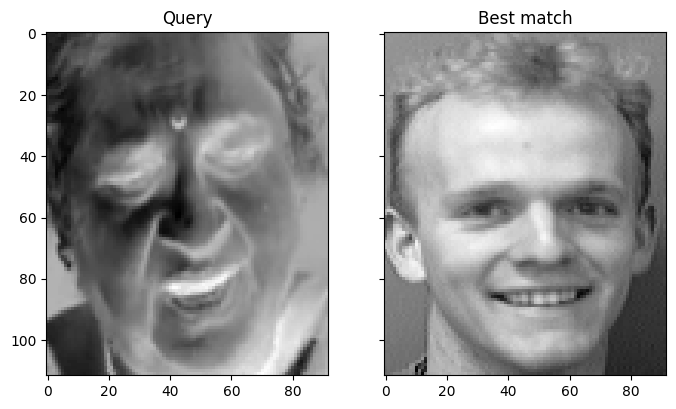

In [11]:
import zipfile
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Read face image from zip file on the fly
faces = {}
with zipfile.ZipFile("/content/drive/MyDrive/pca_face_reognition/pca_dataset-credits_Olivetti_Research_Laboratory.zip") as facezip:
    for filename in facezip.namelist():
        if not filename.endswith(".pgm"):
            continue # not a face picture
        with facezip.open(filename) as image:
            # If we extracted files from zip, we can use cv2.imread(filename) instead
            faces[filename] = cv2.imdecode(np.frombuffer(image.read(), np.uint8), cv2.IMREAD_GRAYSCALE)
frame_faces = {}
with zipfile.ZipFile("/content/drive/MyDrive/pca/faces.zip") as facezip:
    for filename in facezip.namelist():
        if not filename.endswith(".pgm"):
            continue # not a face picture
        with facezip.open(filename) as image:
            # If we extracted files from zip, we can use cv2.imread(filename) instead
            frame_faces[filename] = cv2.imdecode(np.frombuffer(image.read(), np.uint8), cv2.IMREAD_GRAYSCALE)


# Show sample faces using matplotlib
fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(8,10))
faceimages = list(faces.values())[-16:] # take last 16 images
for i in range(16):
    axes[i%4][i//4].imshow(faceimages[i], cmap="gray")
print("Showing sample faces")
plt.show()

# Print some details
faceshape = list(faces.values())[0].shape
print("Face image shape:", faceshape)

classes = set(filename.split("/")[0] for filename in faces.keys())
print("Number of classes:", len(classes))
print("Number of images:", len(faces))

# Take classes 1-39 for eigenfaces, keep entire class 40 and
# image 10 of class 39 as out-of-sample test
facematrix = []
facelabel = []
for key,val in faces.items():
    if key.startswith("s40/"):
        continue # this is our test set
    if key == "s39/10.pgm":
        continue # this is our test set
    facematrix.append(val.flatten())
    facelabel.append(key.split("/")[0])

# Create a NxM matrix with N images and M pixels per image
facematrix = np.array(facematrix)

# Apply PCA and take first K principal components as eigenfaces
pca = PCA().fit(facematrix)

n_components = 50
eigenfaces = pca.components_[:n_components]

# Show the first 16 eigenfaces
fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(8,10))
for i in range(16):
    axes[i%4][i//4].imshow(eigenfaces[i].reshape(faceshape), cmap="gray")
print("Showing the eigenfaces")
plt.show()

# Generate weights as a KxN matrix where K is the number of eigenfaces and N the number of samples
weights = eigenfaces @ (facematrix - pca.mean_).T
print("Shape of the weight matrix:", weights.shape)

# Test on out-of-sample image of existing class
query = faces["s39/10.pgm"].reshape(1,-1)
query_weight = eigenfaces @ (query - pca.mean_).T
euclidean_distance = np.linalg.norm(weights - query_weight, axis=0)
best_match = np.argmin(euclidean_distance)
print("Best match %s with Euclidean distance %f" % (facelabel[best_match], euclidean_distance[best_match]))
# Visualize
fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(8,6))
axes[0].imshow(query.reshape(faceshape), cmap="gray")
axes[0].set_title("Query")
axes[1].imshow(facematrix[best_match].reshape(faceshape), cmap="gray")
axes[1].set_title("Best match")
plt.show()

# Test on out-of-sample image of new class
query = faces["s40/1.pgm"].reshape(1,-1)
query_weight = eigenfaces @ (query - pca.mean_).T
euclidean_distance = np.linalg.norm(weights - query_weight, axis=0)
best_match = np.argmin(euclidean_distance)
print("Best match %s with Euclidean distance %f" % (facelabel[best_match], euclidean_distance[best_match]))
# Visualize
fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(8,6))
axes[0].imshow(query.reshape(faceshape), cmap="gray")
axes[0].set_title("Query")
axes[1].imshow(facematrix[best_match].reshape(faceshape), cmap="gray")
axes[1].set_title("Best match")
plt.show()


person_to_check_name = input("Give any name of person to check whether he is in the video frames:")

best_match_results=[]
found_persons=[]
# for frame in frame_faces:
#   query = frame.reshape(1,-1)
#   query_weight = eigenfaces @ (query - pca.mean_).T
#   euclidean_distance = np.linalg.norm(weights - query_weight, axis=0)
#   best_match = np.argmin(euclidean_distance)
#   best_match_results.append(best_match)

# Iterate over each frame in frame_faces
for frame_key, frame_value in frame_faces.items():
    # Reshape the frame into a 1D vector
    query = frame_value.reshape(1, -1)

    # Calculate the weight for the query image
    query_weight = eigenfaces @ (query - pca.mean_).T

    # Compute Euclidean distance between query weight and training weights
    euclidean_distance = np.linalg.norm(weights - query_weight, axis=0)

    # Find the index of the best match
    best_match_index = np.argmin(euclidean_distance)

    # Append the best match index to the results list
    best_match_results.append(best_match_index)

# Now best_match_results contains the indices of the best matches for all frames
# You can further process or analyze these results as needed
print("Best match results:", best_match_results)

for entries in best_match_results:
 found_persons.append(facelabel[entries])
 print("Best match %s with Euclidean distance %f" % (facelabel[entries], euclidean_distance[entries]))

all_words = [word for label in found_persons for word in label.split()]

most_common_word = max(set(all_words), key=all_words.count)
if(most_common_word == person_to_check_name ):
  print(f"The checked person:{most_common_word} is in the video frames")
else:
  print(f"The person seen in most frames of the video is {most_common_word}")
  print(f"The checked person:{person_to_check_name} is mostly Not in the video frames")

# print("Best match %s with Euclidean distance %f" % (facelabel[best_match]))
# # Visualize
fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(8,6))
axes[0].imshow(query.reshape(faceshape), cmap="gray")
axes[0].set_title("Query")
axes[1].imshow(facematrix[best_match].reshape(faceshape), cmap="gray")
axes[1].set_title("Best match")
plt.show()



